In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error

In [73]:
data=pd.read_csv('datacleaned.csv')
data=data.drop(['Unnamed: 0'], axis=1)

# Only taking data from gameweeks 5+

In [74]:
playerlist=list(data['playerid'].unique())

In [75]:
pointsdict={}
fdrdict={}
for i in playerlist:
    ptslist=[]
    fdrlist=[]
    selection=data[data['playerid']==i]
    for gw in range(1,39):
        ptslist.append(selection[selection['GW']==gw].iloc[0]['total_points'])
        fdrlist.append(selection[selection['GW']==gw].iloc[0]['fdr'])
    pointsdict[i]=ptslist
    fdrdict[i]=fdrlist

In [76]:
data.insert(0, 'prevscore', 0)
data.insert(0, 'prevfdr', 0)
data.insert(0, 'prev2score', 0)
data.insert(0, 'prev2fdr', 0)
data.insert(0, 'prev3score', 0)
data.insert(0, 'prev3fdr', 0)
data.insert(0, 'team_goals_scored', 0)
data.insert(0, 'team_goals_conceded', 0)

In [77]:
def calcForm(scores:list)->int:
    weights=[1,2,3,4,5]
    return sum([x*y for x,y in zip(scores,weights)])

In [78]:
prevscorelist = []
prev2scorelist = []
prev3scorelist = []
prevfdrlist = []
prev2fdrlist = []
prev3fdrlist = []
goals_scored = []
goals_conceded = []

for index, row in data.iterrows():
    currgw=row['GW']
        
    if currgw==1:
        prevscorelist.append(0)
        prevfdrlist.append(-1)
    else:
        prevscorelist.append(pointsdict[row['playerid']][currgw-2])
        prevfdrlist.append(fdrdict[row['playerid']][currgw-2])
    
    if currgw in [1,2]:
        prev2scorelist.append(0)
        prev2fdrlist.append(-1)
    else:
        prev2scorelist.append(pointsdict[row['playerid']][currgw-3])
        prev2fdrlist.append(fdrdict[row['playerid']][currgw-3])
    
    if currgw in [1,2,3]:
        prev3scorelist.append(0)
        prev3fdrlist.append(-1)
    else:
        prev3scorelist.append(pointsdict[row['playerid']][currgw-4])
        prev3fdrlist.append(fdrdict[row['playerid']][currgw-4])
    
    if row['was_home']:
        goals_scored.append(row['team_h_score'])
        goals_conceded.append(row['team_a_score'])
    else:
        goals_scored.append(row['team_a_score'])
        goals_conceded.append(row['team_h_score'])

In [79]:
data['prevscore']=prevscorelist
data['prev2score']=prev2scorelist
data['prev3score']=prev3scorelist
data['prevfdr']=prevfdrlist
data['prev2fdr']=prev2fdrlist
data['prev3fdr']=prev3fdrlist
data['team_goals_scored']=goals_scored
data['team_goals_conceded']=goals_conceded

In [80]:
feature_cols=['team', 'playerid', 'name', 'opponent_team', 'value', 
              'was_home', 'GW', 'fdr', 'total_points','prevscore', 'prev2score', 
              'prev3score', 'prevfdr', 'prev2fdr', 'prev3fdr', 'team_goals_scored', 'team_goals_conceded',]
target_col='total_points'

In [81]:
data=data[feature_cols]

In [82]:
data

,team,playerid,name,opponent_team,value,was_home,GW,fdr,total_points,prevscore,prev2score,prev3score,prevfdr,prev2fdr,prev3fdr,team_goals_scored,team_goals_conceded
0,1,11,Pierre-Emerick_Aubameyang_11,13,110,False,1,2.0,6,0,0,0,-1.0,-1.0,-1.0,1.0,0.0
1,1,12,Alexandre_Lacazette_12,13,95,False,1,2.0,0,0,0,0,-1.0,-1.0,-1.0,1.0,0.0
2,1,14,Bernd_Leno_14,13,50,False,1,2.0,7,0,0,0,-1.0,-1.0,-1.0,1.0,0.0
3,2,29,Jack_Grealish_29,17,60,False,1,4.0,2,0,0,0,-1.0,-1.0,-1.0,1.0,3.0
4,3,42,Lewis_Dunk_42,18,45,False,1,2.0,11,0,0,0,-1.0,-1.0,-1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,1,488,Nicolas_Pépé_488,18,89,True,38,2.0,2,1,2,1,2.0,5.0,4.0,3.0,2.0
4024,3,494,Aaron_Ramsdale_494,8,44,False,38,3.0,3,11,1,3,3.0,5.0,3.0,3.0,1.0
4025,4,502,Neal_Maupay_502,5,57,False,38,3.0,5,2,9,1,2.0,3.0,5.0,2.0,1.0
4026,18,525,Ismaïla_Sarr_525,1,59,False,38,3.0,7,2,2,5,5.0,2.0,2.0,2.0,3.0


In [ ]:
goalscoring_form=[]
defensive_form=[]
for index, row in data.iterrows():
    

In [54]:
data.columns

Index(['prev3fdr', 'prev3score', 'prev2fdr', 'prev2score', 'prevfdr',
       'prevscore', 'team', 'playerid', 'name', 'assists', 'clean_sheets',
       'creativity', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'minutes', 'opponent_team', 'round', 'saves',
       'team_a_score', 'team_h_score', 'threat', 'total_points', 'value',
       'was_home', 'yellow_cards', 'GW', 'fdr'],
      dtype='object')

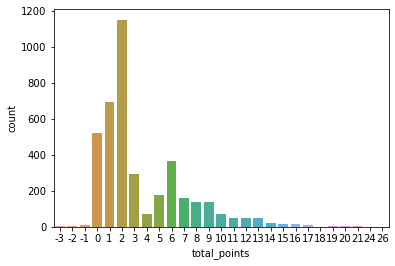

In [56]:
sns.countplot(data['total_points'])

In [57]:
feature_cols=['team', 'playerid', 'name', 'opponent_team', 'round', 'value', 
              'was_home', 'GW', 'fdr', 'prevscore', 'prev2score', 
              'prev3score', 'prevfdr', 'prev2fdr', 'prev3fdr']
target_col='total_points'

In [58]:
data=data[feature_cols]

In [60]:
data

,team,playerid,name,opponent_team,round,value,was_home,GW,fdr,prevscore,prev2score,prev3score,prevfdr,prev2fdr,prev3fdr
0,1,11,Pierre-Emerick_Aubameyang_11,13,1,110,False,1,2.0,16,2,1,2.0,2.0,5.0
1,1,12,Alexandre_Lacazette_12,13,1,95,False,1,2.0,4,1,11,2.0,2.0,5.0
2,1,14,Bernd_Leno_14,13,1,50,False,1,2.0,0,0,0,2.0,2.0,5.0
3,2,29,Jack_Grealish_29,17,1,60,False,1,4.0,10,4,2,2.0,3.0,3.0
4,3,42,Lewis_Dunk_42,18,1,45,False,1,2.0,2,8,2,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,1,488,Nicolas_Pépé_488,18,47,89,True,38,2.0,1,2,1,2.0,5.0,4.0
4024,3,494,Aaron_Ramsdale_494,8,47,44,False,38,3.0,11,1,3,3.0,5.0,3.0
4025,4,502,Neal_Maupay_502,5,47,57,False,38,3.0,2,9,1,2.0,3.0,5.0
4026,18,525,Ismaïla_Sarr_525,1,47,59,False,38,3.0,2,2,5,5.0,2.0,2.0


#### features to add

- team form
- nailedness
- team value constraints
- defensive solidity
- attacking strength